# EDA and Visualization

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Roshini/ML Projects/insurance.csv',)
df.head()
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Distribution of Charges')

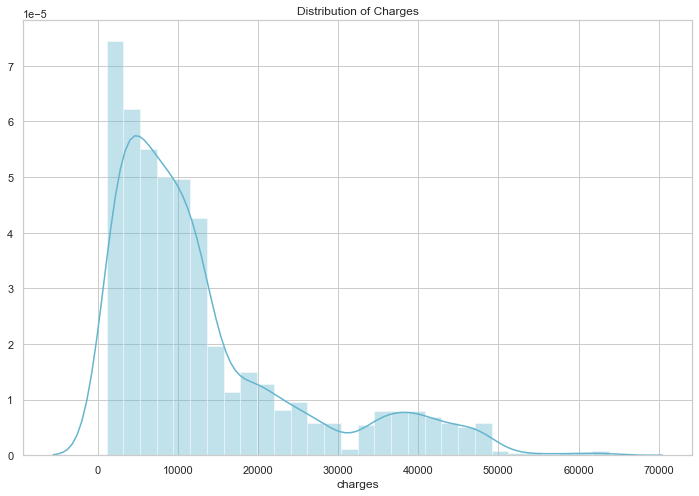

In [7]:
sns.set(style='whitegrid')

f, ax = plt.subplots(1,1, figsize=(12, 8))

ax = sns.distplot(df['charges'], kde = True, color = 'c')

plt.title('Distribution of Charges')

- it appears to e left skewed so we'll normalise it. 

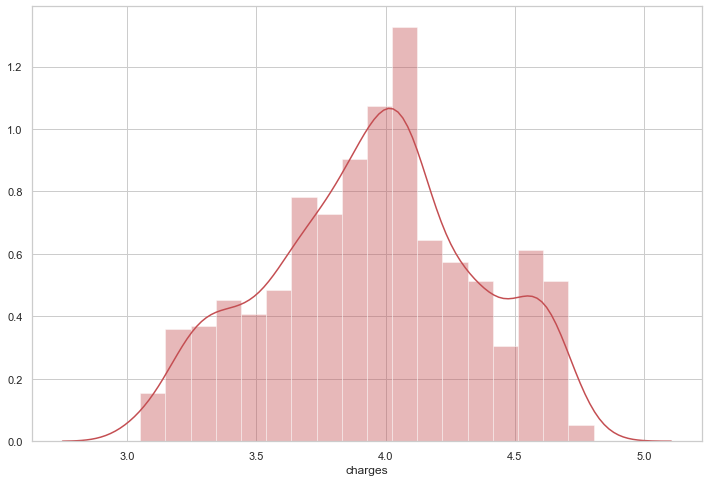

In [8]:
f, ax = plt.subplots(1,1,figsize = (12,8))
ax = sns.distplot(np.log10(df['charges']),kde = True, color = 'r')

In [16]:
charges = df.groupby(['region'])['charges'].sum()
charges

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

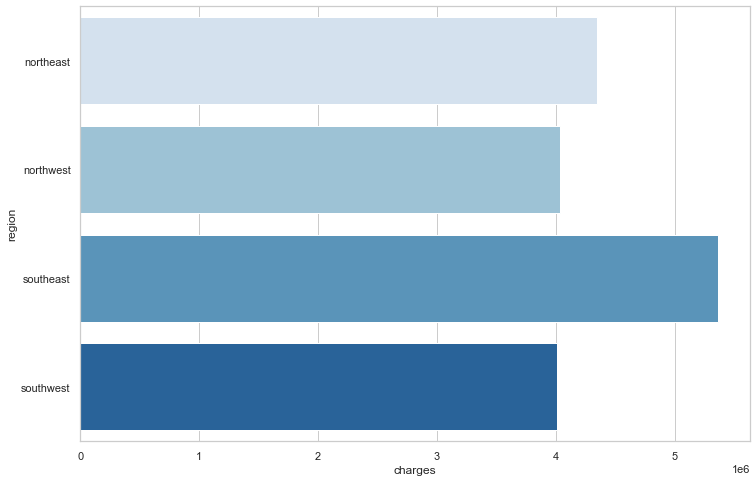

In [20]:
f, ax = plt.subplots(1,1,figsize = (12,8))
ax = sns.barplot(charges.head(),charges.head().index,palette = 'Blues')

- southeast has way more charges than the rest of the regions

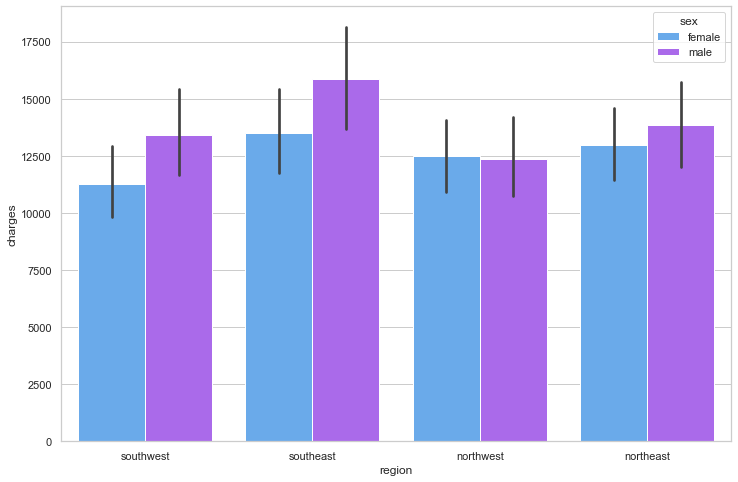

In [21]:
f, ax = plt.subplots(1,1,figsize = (12,8))
ax = sns.barplot(x = 'region',y='charges', hue = 'sex',data= df, palette ='cool')

- however there isnt any significant change in charges when it comes to charges by gender 

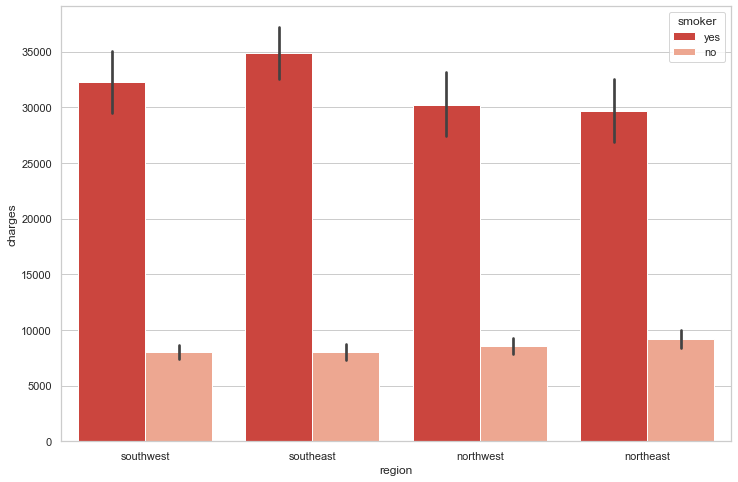

In [22]:
f, ax = plt.subplots(1,1,figsize = (12,8))
ax = sns.barplot(x = 'region',y='charges', hue = 'smoker',data= df, palette ='Reds_r')

- Smokers have way higher medical charges than non smokers

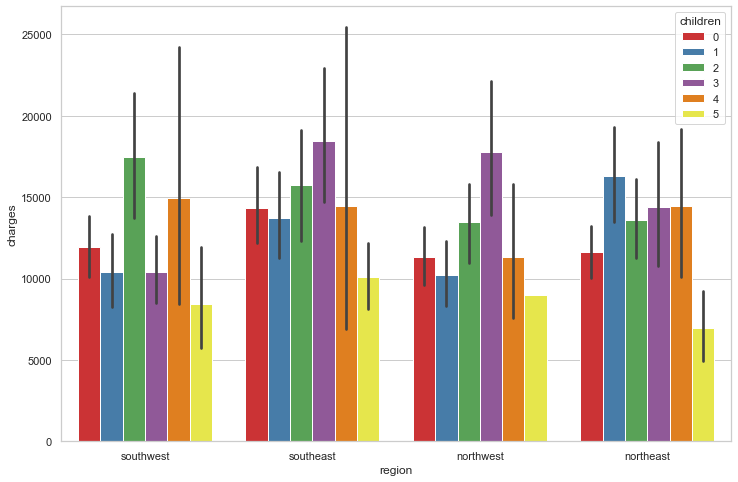

In [25]:
f, ax = plt.subplots(1,1,figsize = (12,8))
ax = sns.barplot(x = 'region',y='charges', hue = 'children',data= df, palette ='Set1')

- from the above graph we can conclude that people with children tend to have more medical expenses.

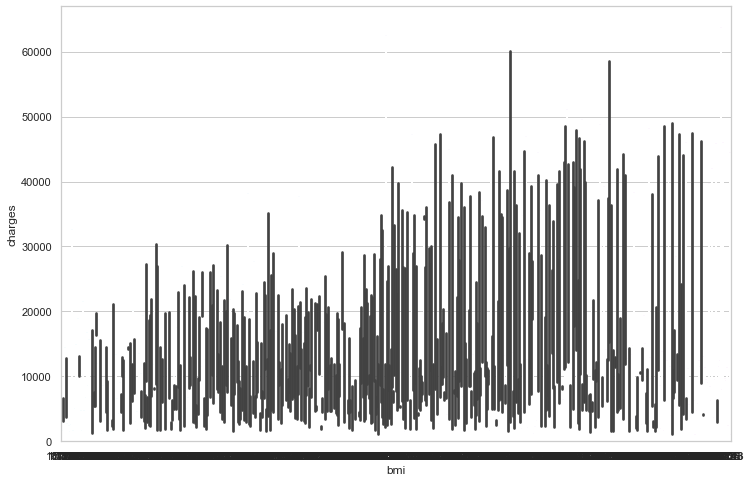

In [26]:
f, ax = plt.subplots(1,1,figsize = (12,8))
ax = sns.barplot(x = 'bmi',y='charges',data= df, palette ='cool')

 - charges increase as the bmi increases 

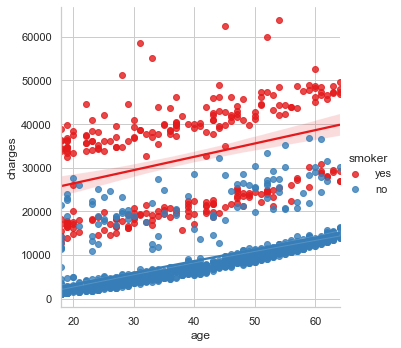

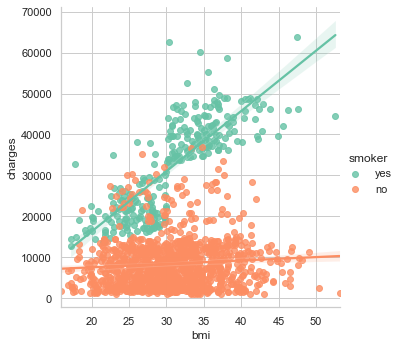

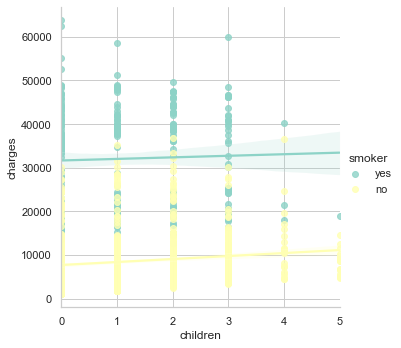

In [28]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

- smoking has the highest impact on the medical insurance charges 

In [29]:
from sklearn import preprocessing
cdf =df 
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['region'] = le.fit_transform(res_df['region'])
    res_df['smoker'] = le.fit_transform(res_df['smoker'])
    res_df['sex'] = le.fit_transform(res_df['sex'])
    return res_df

In [32]:
edf = preprocessor(cdf)
edf

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [34]:
edf.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

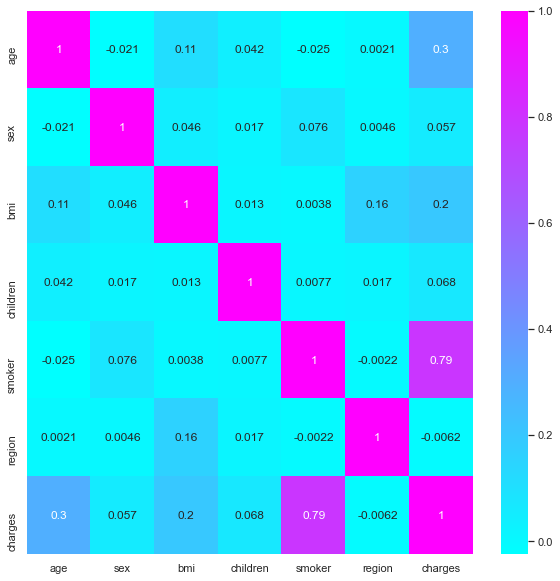

In [36]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(edf.corr(), annot=True, cmap='cool')

- the features that have lowest correlation are :  region and sex, we can come back to remove them if the model is bad 

### Linear Regression 
- we are using this algo because what we are predicting is a continous variable not class 


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

x = edf.drop(['charges'], axis = 1)
y = edf['charges']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)
LR = LinearRegression()
LR.fit(x_train, y_train)
print(LR.intercept_)
print(LR.coef_)
print(LR.score(x_test,y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


## Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495807
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138


## Lasso Regression 

In [39]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039537
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


## Random Forest Regressor 

In [40]:
from sklearn.ensemble import RandomForestRegressor as rfr

Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3635087.011, MSE test data: 19766481.085
R2 train data: 0.971, R2 test data: 0.877


## Feature Importance 

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218724)
3.age(0.136971)
4.children(0.021047)
5.region(0.015208)
6.sex(0.006371)


<BarContainer object of 6 artists>

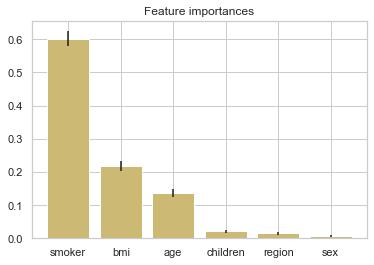

In [42]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [46]:
from sklearn.preprocessing import PolynomialFeatures
x = edf.drop(['charges', 'sex', 'region'], axis = 1)
y = edf.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252248
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345225


In [47]:
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,y_train_pred, y_train),
       metrics.r2_score(y_test,y_test_pred, y_test)))

R2 train data: 0.775, R2 test data: 0.857


## Performance Metrics 